# Greg

# James

In [1]:
#Imports
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import string
import scipy.stats as stats

%matplotlib inline

In [2]:
#Read the data frame
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

#Clean columns into floats into floats
tn_movie_budgets['production_budget'] = (
    tn_movie_budgets['production_budget'].map(
        lambda x : float(x.replace('$', '').replace(',', ''))))
tn_movie_budgets['domestic_gross'] = (
    tn_movie_budgets['domestic_gross'].map(
        lambda x : float(x.replace('$', '').replace(',', ''))))
tn_movie_budgets['worldwide_gross'] = (
    tn_movie_budgets['worldwide_gross'].map(
        lambda x : float(x.replace('$', '').replace(',', ''))))

#Creates a date time from release date
tn_movie_budgets['release_date']=(
    pd.to_datetime(tn_movie_budgets['release_date']))

#Creates a new title column
tn_movie_budgets['title']= (
    tn_movie_budgets['movie'].map(
        lambda x :''.join(filter(str.isalnum, x)).lower()))

tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,title
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,avatar
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,piratesofthecaribbeanonstrangertides
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,darkphoenix
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,avengersageofultron
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,starwarsepviiithelastjedi
...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,red11
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,following
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,returntothelandofwonders
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,aplaguesopleasant


In [3]:

tn_movie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


In [4]:
#gets basic stats 
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tmdb_movies.head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [5]:
conn = sqlite3.connect('zippedData/im.db')

pd.read_sql('''
SELECT name FROM sqlite_master  
  WHERE type='table'
''', conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [6]:
q = '''
SELECT * FROM movie_basics
WHERE original_title LIKE '%frozen%'
;
'''

pd.read_sql(q, conn)

#movie basics has 150k rows, movie basics has 73k

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10047356,Eises Kälte - Frozen in Time,Eises Kälte - Frozen in Time,2018,92.0,Mystery
1,tt10059478,Frozen Faith: Cryonics and the Quest to Cheat ...,Frozen Faith: Cryonics and the Quest to Cheat ...,2016,NaN,Documentary
2,tt10178906,The Frozen Maze,The Frozen Maze,2018,95.0,"Mystery,Thriller"
3,tt10230504,Extraordinary People: Frozen From Dusk Till Dawn,Extraordinary People: Frozen From Dusk Till Dawn,2018,NaN,Documentary
4,tt10349550,Rapunzel: A Princess Frozen in Time,Rapunzel: A Princess Frozen in Time,2019,90.0,Fantasy
5,tt1323045,Frozen,Frozen,2010,93.0,"Adventure,Drama,Sport"
6,tt1719666,The 2010 Frozen Four Official Championship Film,The 2010 Frozen Four Official Championship Film,2010,69.0,Documentary
7,tt2005374,The Frozen Ground,The Frozen Ground,2013,105.0,"Crime,Drama,Mystery"
8,tt2197378,Frozen Time,Frozen Time,2011,109.0,Drama
9,tt2294629,Frozen,Frozen,2013,102.0,"Adventure,Animation,Comedy"


<AxesSubplot:xlabel='production_budget', ylabel='domestic_gross'>

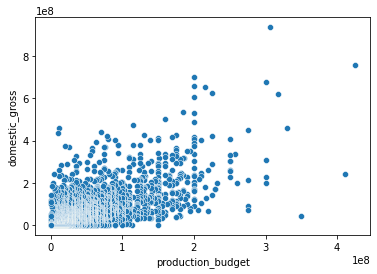

In [7]:
sns.scatterplot(x = tn_movie_budgets['production_budget'], 
                y = tn_movie_budgets['domestic_gross'])


In [8]:
tn_movie_budgets.corr()

,id,production_budget,domestic_gross,worldwide_gross
id,1.000000,-0.035278,0.008255,-0.009422
production_budget,-0.035278,1.000000,0.685682,0.748306
domestic_gross,0.008255,0.685682,1.000000,0.938853
worldwide_gross,-0.009422,0.748306,0.938853,1.000000


## Genre Testing

In [9]:
#Create query 
q = '''
SELECT * 
FROM movie_basics
'''
#create a DF from the IMBD sql table
imdb_movie_ratings = pd.read_sql(q, conn)
#remove na's from the original title due to low numbers
imdb_movie_ratings.dropna(subset=['original_title'], inplace = True)
imdb_movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146123 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146123 non-null  object 
 1   primary_title    146123 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146123 non-null  int64  
 4   runtime_minutes  114401 non-null  float64
 5   genres           140734 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.8+ MB


In [10]:
#create a column for movie names to merge with other DFs   tn_movie_budgets
imdb_movie_ratings['title'] = (
    imdb_movie_ratings['original_title'].map(
        lambda x :''.join(filter(str.isalnum, x)).lower()))

#sets the index on the title field for the merge
tn_movie_budgets.set_index('title', inplace=True)
imdb_movie_ratings.set_index('title', inplace=True)
imdb_movie_ratings.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
title,,,,,,
sunghursh,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
ashadkaekdin,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
theothersideofthewind,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
sabsebadasukh,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
latelenovelaerrante,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [11]:
#join new imdb with the numbers table
#tn_movie_budgets.set_index('title', inplace=True)

#combine imdb and the numbers tables
rating_and_budgets = tn_movie_budgets.join(imdb_movie_ratings, how = 'inner')
rating_and_budgets.reset_index(inplace=True)
rating_and_budgets = (
    rating_and_budgets.drop_duplicates(subset='title', keep="first"))
rating_and_budgets

,title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,10cloverfieldlane,54,2016-03-11,10 Cloverfield Lane,5000000.0,72082999.0,1.082864e+08,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery"
1,10daysinamadhouse,48,2015-11-11,10 Days in a Madhouse,12000000.0,14616.0,1.461600e+04,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama
2,127hours,6,2010-11-05,127 Hours,18000000.0,18335230.0,6.021717e+07,tt1542344,127 Hours,127 Hours,2010,94.0,"Adventure,Biography,Drama"
3,12rounds,37,2009-03-27,12 Rounds,20000000.0,12234694.0,1.730665e+07,tt3517850,12 Rounds,12 Rounds,2017,NaN,"Action,Drama,Romance"
4,12strong,64,2018-01-19,12 Strong,35000000.0,45819713.0,7.111838e+07,tt1413492,12 Strong,12 Strong,2018,130.0,"Action,Drama,History"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3763,zookeeper,71,2011-07-08,Zookeeper,80000000.0,80360866.0,1.708055e+08,tt1222817,Zookeeper,Zookeeper,2011,102.0,"Comedy,Family,Romance"
3764,zoolander2,64,2016-02-12,Zoolander 2,50000000.0,28848693.0,5.534869e+07,tt1608290,Zoolander 2,Zoolander 2,2016,101.0,Comedy
3765,zoom,26,2006-08-11,Zoom,35000000.0,11989328.0,1.250619e+07,tt3763866,Zoom,Zoom,2015,96.0,"Animation,Comedy,Drama"
3769,zootopia,57,2016-03-04,Zootopia,150000000.0,341268248.0,1.019430e+09,tt2948356,Zootopia,Zootopia,2016,108.0,"Adventure,Animation,Comedy"


In [12]:
rating_and_budgets['genres'] =  rating_and_budgets['genres'].str.split(',')
rating_and_budgets

,title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,10cloverfieldlane,54,2016-03-11,10 Cloverfield Lane,5000000.0,72082999.0,1.082864e+08,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"[Drama, Horror, Mystery]"
1,10daysinamadhouse,48,2015-11-11,10 Days in a Madhouse,12000000.0,14616.0,1.461600e+04,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,[Drama]
2,127hours,6,2010-11-05,127 Hours,18000000.0,18335230.0,6.021717e+07,tt1542344,127 Hours,127 Hours,2010,94.0,"[Adventure, Biography, Drama]"
3,12rounds,37,2009-03-27,12 Rounds,20000000.0,12234694.0,1.730665e+07,tt3517850,12 Rounds,12 Rounds,2017,NaN,"[Action, Drama, Romance]"
4,12strong,64,2018-01-19,12 Strong,35000000.0,45819713.0,7.111838e+07,tt1413492,12 Strong,12 Strong,2018,130.0,"[Action, Drama, History]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3763,zookeeper,71,2011-07-08,Zookeeper,80000000.0,80360866.0,1.708055e+08,tt1222817,Zookeeper,Zookeeper,2011,102.0,"[Comedy, Family, Romance]"
3764,zoolander2,64,2016-02-12,Zoolander 2,50000000.0,28848693.0,5.534869e+07,tt1608290,Zoolander 2,Zoolander 2,2016,101.0,[Comedy]
3765,zoom,26,2006-08-11,Zoom,35000000.0,11989328.0,1.250619e+07,tt3763866,Zoom,Zoom,2015,96.0,"[Animation, Comedy, Drama]"
3769,zootopia,57,2016-03-04,Zootopia,150000000.0,341268248.0,1.019430e+09,tt2948356,Zootopia,Zootopia,2016,108.0,"[Adventure, Animation, Comedy]"


In [13]:
#create dummy collumns to get counts and easy splits
rating_and_budgets= (
    rating_and_budgets.drop('genres',1).join(
        rating_and_budgets.genres.str.join('|').str.get_dummies()))


In [14]:
#Gets the counts or all of the genre categories
counts = rating_and_budgets.iloc[:,14:42].sum()
#Highest counts - Drama, comedy
print(counts)

Animation       131
Biography       189
Comedy          680
Crime           310
Documentary     196
Drama          1144
Family          139
Fantasy         156
History          69
Horror          285
Music            70
Musical          20
Mystery         169
News              1
Romance         276
Sci-Fi          176
Sport            48
Thriller        392
War              37
Western          20
dtype: int64


In [15]:
#Lists for each individual statistics
#for genre in counts.index:
#    worldwide_gross_median.append(
#        rating_and_budgets[rating_and_budgets[genre] == 1]\
#            ['worldwide_gross'].median())

# Goes through each category and gets the statistic from it. 
# Then puts it in a dict with the counts

#Creates a new DF for processing
randb = rating_and_budgets.copy()
#median

worldwide_gross_median= [randb[randb[i] == 1]['worldwide_gross'].median() 
                         for i in counts.index]    
median_worldwide_gross = dict(zip(counts.index, worldwide_gross_median))

#mode
worldwide_gross_means = [randb[randb[i] == 1]['worldwide_gross'].mean() 
                         for i in counts.index]
mean_worldwide_gross = dict(zip(counts.index, worldwide_gross_means))

#count
worldwide_gross_counts = [randb[randb[i] == 1]['worldwide_gross'].count() 
                          for i in counts.index]
worldwide_gross_counts = dict(zip(counts.index, worldwide_gross_counts))

#max
worldwide_gross_max = [randb[randb[i] == 1]['worldwide_gross'].max() 
                       for i in counts.index]
worldwide_gross_max = dict(zip(counts.index, worldwide_gross_max))

#min
worldwide_gross_min = [randb[randb[i] == 1]['worldwide_gross'].min() 
                       for i in counts.index]
worldwide_gross_min = dict(zip(counts.index, worldwide_gross_min))

In [16]:
#sorts the values for data exploration
rating_and_budgets[rating_and_budgets['Music']==1].sort_values(
                                            'worldwide_gross',ascending=False)

,title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
403,bohemianrhapsody,84,2018-11-02,Bohemian Rhapsody,55000000.0,216303339.0,894985342.0,tt1727824,Bohemian Rhapsody,Bohemian Rhapsody,...,1,0,0,0,0,0,0,0,0,0
248,astarisborn,5,2018-10-05,A Star is Born,36000000.0,215288866.0,433449571.0,tt1517451,A Star Is Born,A Star Is Born,...,1,0,0,0,1,0,0,0,0,0
1583,lalaland,92,2016-12-09,La La Land,20000000.0,151101803.0,426351163.0,tt3783958,La La Land,La La Land,...,1,0,0,0,0,0,0,0,0,0
2101,pitchperfect2,14,2015-05-15,Pitch Perfect 2,29000000.0,184296230.0,287625468.0,tt2848292,Pitch Perfect 2,Pitch Perfect 2,...,1,0,0,0,0,0,0,0,0,0
2102,pitchperfect3,58,2017-12-22,Pitch Perfect 3,45000000.0,104897530.0,185736412.0,tt4765284,Pitch Perfect 3,Pitch Perfect 3,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,alongtheroadside,91,2015-03-24,Along the Roadside,250000.0,0.0,3234.0,tt2290113,Along the Roadside,Along the Roadside,...,1,0,0,0,1,0,0,0,0,0
162,americanhero,3,2015-12-11,American Hero,1000000.0,0.0,26.0,tt2414176,American Hero,American Hero,...,1,0,0,0,0,0,0,0,0,0
3220,theresaisamother,40,2015-09-29,Theresa Is a Mother,200000.0,0.0,0.0,tt1989646,Theresa Is a Mother,Theresa Is a Mother,...,1,0,0,0,0,0,0,0,0,0
2548,steelspirit,58,2003-12-01,Steel Spirit,20000.0,0.0,0.0,tt4227178,Steel //Spirit,Steel //Spirit,...,1,0,0,0,0,0,0,0,0,0


In [17]:
#creates dataframe to highlight the stats
movie_stats = pd.DataFrame(
    zip(median_worldwide_gross.values(), 
        mean_worldwide_gross.values(), 
        worldwide_gross_counts.values(), 
        worldwide_gross_max.values(),
        worldwide_gross_min.values()),
    median_worldwide_gross.keys(),
        ['Medians','Means','Counts','Max','Min'])

In [18]:
#sorts the DF by median
movie_stats.sort_values('Medians', ascending=False)

,Medians,Means,Counts,Max,Min
Animation,197578586.0,3.006570e+08,131,1.242521e+09,0.0
Fantasy,84720721.5,2.078764e+08,156,1.259200e+09,0.0
Sci-Fi,79476525.5,2.553969e+08,176,2.048134e+09,0.0
News,57293371.0,5.729337e+07,1,5.729337e+07,57293371.0
Comedy,46055025.0,1.122968e+08,680,1.160336e+09,0.0
Family,42174545.0,1.401701e+08,139,1.259200e+09,0.0
Mystery,34246770.0,7.642743e+07,169,5.864643e+08,0.0
Musical,30128794.5,1.309215e+08,20,1.259200e+09,0.0
Crime,27552360.5,6.265413e+07,310,1.234846e+09,0.0
Thriller,25696249.5,8.100579e+07,392,1.234846e+09,0.0


C:\Users\jniegocki\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jniegocki\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='worldwide_gross', ylabel='Density'>

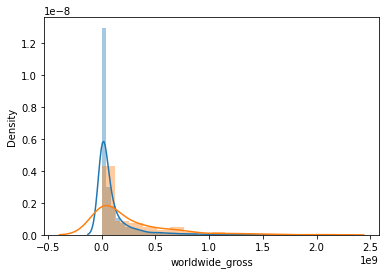

In [19]:
#plot the distribution of overall and the category
sns.distplot(rating_and_budgets['worldwide_gross'])
sns.distplot(
    rating_and_budgets[rating_and_budgets['Sci-Fi']==1]['worldwide_gross'])

In [20]:
#Creates two DFs, one with Sci-Fi and one without
animated_movies = rating_and_budgets[rating_and_budgets['Sci-Fi'] == 1]
not_animated_movies = rating_and_budgets[rating_and_budgets['Sci-Fi'] == 0]

In [21]:
#Runs a ttest
stats.ttest_ind(animated_movies['worldwide_gross'], 
                not_animated_movies['worldwide_gross'])

Ttest_indResult(statistic=10.570233558029575, pvalue=1.48717395752926e-25)

In [22]:
#Does the above tests for every genre
ttest_res = []
for genre in counts.index:
    genre_movie = rating_and_budgets[rating_and_budgets[genre] == 1]
    not_genre_movies = rating_and_budgets[rating_and_budgets[genre] == 0]
    ttest_res.append(stats.ttest_ind(genre_movie['worldwide_gross'], 
                                     not_genre_movies['worldwide_gross']))
    
ttest_res

#Warning happens due to th T-test being ran on news, which has 2 samples

C:\Users\jniegocki\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:3583: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\jniegocki\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\jniegocki\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


[Ttest_indResult(statistic=11.819691277138588, pvalue=2.2692702400680073e-31),
 Ttest_indResult(statistic=-2.7966397138567887, pvalue=0.005205041694229788),
 Ttest_indResult(statistic=1.047405756099582, pvalue=0.29501843255875276),
 Ttest_indResult(statistic=-4.057785417529457, pvalue=5.1131046465999955e-05),
 Ttest_indResult(statistic=-4.2692549623054825, pvalue=2.0378770368998445e-05),
 Ttest_indResult(statistic=-10.45618829039637, pvalue=4.725721936090204e-25),
 Ttest_indResult(statistic=2.1078758810063034, pvalue=0.0351456427411942),
 Ttest_indResult(statistic=6.674638667694225, pvalue=3.0707557723409656e-11),
 Ttest_indResult(statistic=-2.165103541533435, pvalue=0.030478460461883773),
 Ttest_indResult(statistic=-4.632481554676081, pvalue=3.8070833294726926e-06),
 Ttest_indResult(statistic=-1.8023058719111054, pvalue=0.07162329352077343),
 Ttest_indResult(statistic=0.5708557069525074, pvalue=0.5681511484345387),
 Ttest_indResult(statistic=-1.9623000829139412, pvalue=0.0498434741088

In [23]:
#Creates a DF for all the t-statistics and pvals
tscores = pd.DataFrame(dict(zip(counts.index, ttest_res)), 
                       ["Statistic", "Pvalue"]).T

In [24]:
#sorts the df by statistic
tscores.sort_values('Statistic')

,Statistic,Pvalue
Drama,-10.456188,4.725722e-25
Horror,-4.632482,3.807083e-06
Documentary,-4.269255,2.037877e-05
Romance,-4.233917,2.383419e-05
Crime,-4.057785,5.113105e-05
Biography,-2.796640,5.205042e-03
Thriller,-2.656510,7.947929e-03
History,-2.165104,3.047846e-02
Mystery,-1.962300,4.984347e-02
Music,-1.802306,7.162329e-02


In [25]:
#Plot average worldwide gross
#Plot production budget
#Graph top values

#len(counts.index)
rating_and_budgets['worldwide_gross'].median()

30063805.0

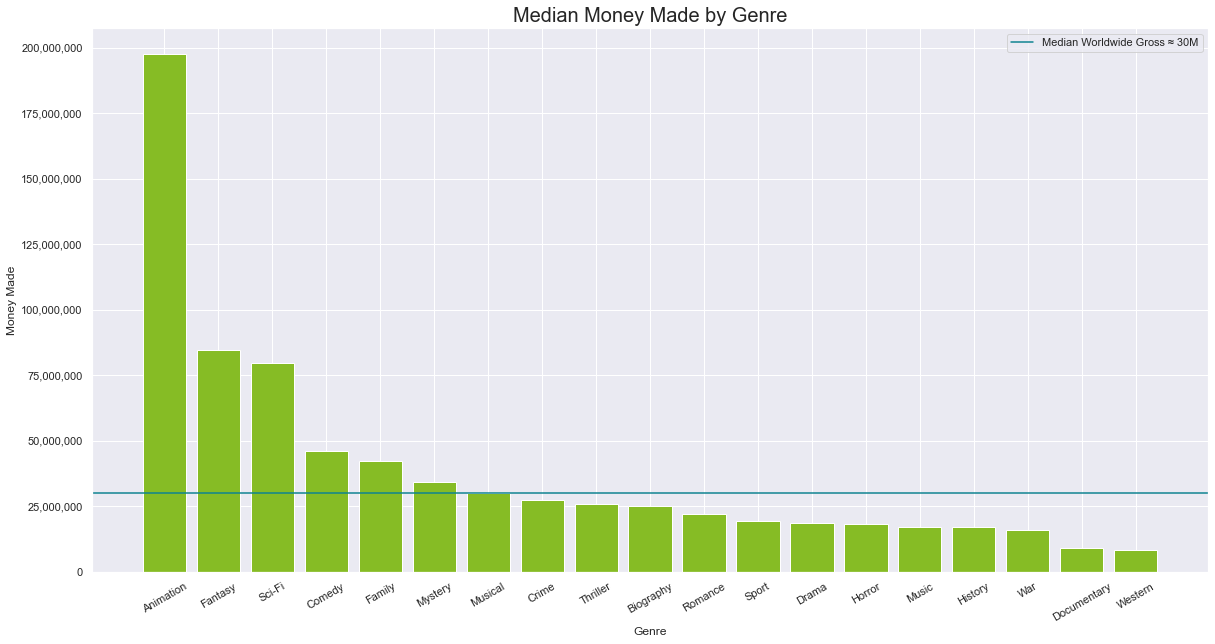

In [26]:
#Sets the theme to seaborn
sns.set_theme()

#Remove News as there is only 1 sample
cleaned_stats = movie_stats.drop(
    index='News').sort_values('Medians', ascending=False)

#Create figure
fig, ax = plt.subplots(figsize=(20,10))

#Create a bar plot for all of the medians for each genre
ax.bar(range(0,len(cleaned_stats['Medians'])), 
       list(cleaned_stats['Medians']), color = '#86BC25')

#Creates the xticks
ax.set_xticks(range(0,len(cleaned_stats['Medians'])))
ax.set_xticklabels(list(cleaned_stats.index.values), rotation = 30)

#Sets the tables and the titles
ax.set_xlabel('Genre')
ax.set_ylabel('Money Made')
ax.set_title('Median Money Made by Genre', fontsize=20)
#Cleans up the formatting of
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#plot median income line
plt.axhline(y = rating_and_budgets['worldwide_gross'].median(), 
            color = '#0D8390', linestyle = '-', 
            label = 'Median Worldwide Gross ≈ 30M')
#Shows the legend
ax.legend()

plt.show()

# Han

# Rachel

# Himansri